In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# https://www.reddit.com/r/Bitcoin/comments/7tzq3w/generate_your_own_private_key_5_lines_of_python/
# https://codereview.stackexchange.com/questions/185106/bitcoin-wallet-address-and-private-key-generator

import os, binascii, hashlib, base58

def generate_random_key():
    fullkey = "80"+ binascii.hexlify(os.urandom(32)).decode()
    sha256a = hashlib.sha256(binascii.unhexlify(fullkey)).hexdigest()
    sha256b = hashlib.sha256(binascii.unhexlify(sha256a)).hexdigest()
    return base58.b58encode(binascii.unhexlify(fullkey+sha256b[:8]))

def generate_random_value(max_val):
    return max_val*np.random.random()

In [5]:
# balance sheet of random addresses and values

n = 1000         # number of users
max_val = 5000   # maximum initial amount

class Balances:
    def __init__(self, n, max_val):
        self.keys = [ generate_random_key().decode("utf-8") for i in range(n) ]
        self.init_values = [ generate_random_value(max_val) for i in range(n) ]
        self.data = pd.DataFrame(data={'address': self.keys, 'values': self.init_values})
        
    def transaction(self, from_ind, to_ind, val):
        self.data.at[from_ind,'values'] -= val
        self.data.at[to_ind,'values'] += val

In [6]:
balances = Balances(n, max_val)

balances.data

,address,values
0,5KdJ8wsFWZTLSVkMBqkVphetZ4hXcoP2Pt42XgHktveM6u...,1096.500423
1,5K5r2yYcGrTGBdn65119zQewgDVshpSn695a716nViqWBG...,1237.001615
2,5KA4N6CNjM3fCs2Umg66fuXnpvyV67jiVzH8Zkg8onSj68...,2971.405208
3,5KbchVBPiLEcS5EMBMymFG3hkU9zA19Ugvek2CEVLdeUk6...,218.738826
4,5K95fzeB6KKctQ3wZyrivDkEeFvw5yHKG8vhqV7v9RJsYN...,2844.062365
5,5J8jp6jMbenfeCLwFCQWPomw9aS9SGXNqJthSNGPSfnKvs...,632.066875
6,5Ju9jBHxivkJXqaq8nuiJ6ito5AchZeHNVb2LYPG9YSzTf...,4186.896597
7,5JTj87c6FdsyHQ6eqN3xubrLK2GGAynnMVumpsh5SLETw6...,2895.988073
8,5HzLLumZDWHEWFPZeodWEfL6SDFZ5Mh2wCVkZ3wnDuJZpf...,4926.493779
9,5JqeQpoPVXgqzqzkd9F1rYW5LWdrahk2XMy8hGCyFBuNJ1...,2366.226986


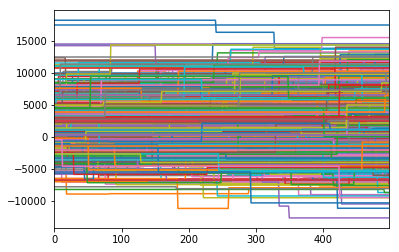

In [12]:
# simulate

def simulate(balances, cycles):
    txdata = pd.DataFrame()
    
    for i in range(cycles):
        to_ind = from_ind = np.random.randint(0, n)
        while from_ind == to_ind:
            from_ind = np.random.randint(0, n)

        val = generate_random_value(max_val)

        balances.transaction(to_ind, from_ind, val)

        txdata = txdata.append(balances.data['values'], ignore_index=True)
        
    return txdata

cycles = 500
txdata = simulate(balances, cycles)

plt.figure()

txdata.plot(legend=False)

plt.show()

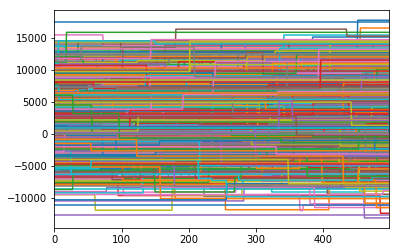

In [13]:
txdata = simulate(balances, cycles)

plt.figure()

txdata.plot(legend=False)

plt.show()

In [ ]:
test.data.iloc[[0,50]]

In [ ]:
test.transaction(0, 50, 678)

test.data.iloc[[0,50]]